# 1. Voronoi Diagram Path-Planning

## Let's create a simple binary map

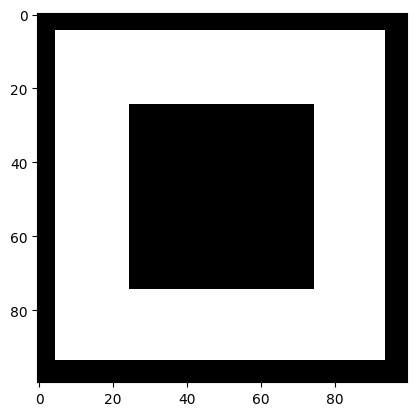

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import Voronoi, voronoi_plot_2d

# 0 = OBSTACLE
# 1 = FREE SPACE

# Create a binary 100x100 image 
Image = np.ones((100, 100), dtype=None) #TODO
# Create boundaries
Image[0:5,:] = 0 #TODO
Image[:,0:5] = 0 #TODO
Image[:,-6:] = 0 #TODO
Image[-6:,:] = 0 #TODO
# Create obstalce
Image[int(Image.shape[0]/2-Image.shape[0]/4):int(Image.shape[0]/2+Image.shape[0]/4), int(Image.shape[1]/2-Image.shape[1]/4):int(Image.shape[1]/2+Image.shape[1]/4)] = 0 #TODO

# Visualize the Image 
plt.imshow(Image, cmap='gray')
#plt.axis('off')
plt.show()

## Initialize the start point and the target point coordinates

In [2]:
# Get image dimensions 
sz = Image.shape

# Initalize start and target point coordinates in the Cfree space 
# Start
xs = 15 #TODO 
ys = 50 #TODO
# Target
xg = 85 #TODO
yg = 20 #TODO

# Pose Matrix (we give a value = 1 to the start and target point, we need this part only for visualization purpose)
pose = np.zeros((sz[0],sz[1]))
pose[ys,xs] = 1
pose[yg,xg] = 1

## Nodes definition for Voronoi Diagram

In [3]:
# Node definition for Voronoi Diagram
xv = []
yv = []
for i in range(sz[0]):
    for j in range(sz[1]):
        if Image[i,j] == 0:
            xv.append(j)
            yv.append(i)

## Voronoi diagram creation 

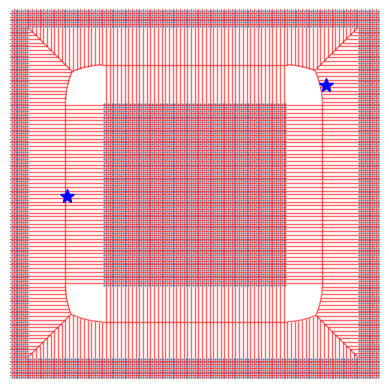

In [4]:
points = np.column_stack((xv, yv))
vor = Voronoi(points)

# Visualize diagram
fig, ax = plt.subplots()
ax.set_aspect('equal')
voronoi_plot_2d(vor, ax=ax, show_points=True, show_vertices=False, line_colors='r', line_width=1, line_alpha=0.6, point_size=1)

plt.axis('image')
plt.axis('off')
plt.spy(pose, marker='*', color='b')

plt.show()


In [5]:
vr = vor.vertices
vrx = np.array(vr[:,0])
vry = np.array(vr[:,1])

## Let's plot our diagram and our start and target point

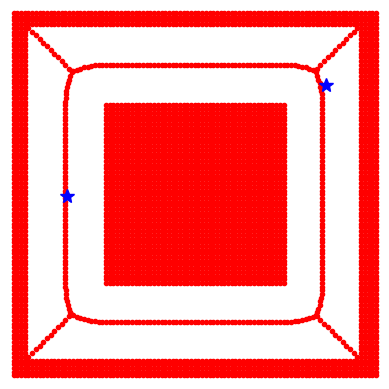

In [6]:
plt.plot(vrx, vry, '.', color = 'r')  
plt.spy(pose, marker='*', color='b')
plt.axis('off')
ax.set_xlim([0, 100])
ax.set_ylim([0, 100])
plt.show()


## Let's compute our best path

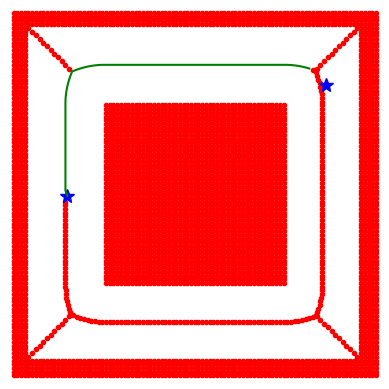

In [7]:
x = xs 
y = ys

indk = 0
path = np.zeros((2, 1000))  # Assuming a maximum of 1000 iterations
while (abs(x - xg) > 5) or (abs(y - yg) > 5):  # until we get very close to goal
    path[:, indk] = [x, y]
    dist = np.sqrt((vrx - x) ** 2 + (vry - y) ** 2)
    goal = np.sqrt((xg - x) ** 2 + (yg - y) ** 2)
    # Find closest vertices of the Voronoi edges
    ind = np.argmin(dist)
    xt = vrx[ind]
    yt = vry[ind]
    goalj = np.sqrt((xg - xt) ** 2 + (yg - yt) ** 2)
    if goalj < goal:  # we are going in the right direction
        x = xt
        y = yt
        vrx[ind] = 1E6  # we don't want to go back and forth...
        vry[ind] = 1E6
        indk += 1
    else:  # we are moving in the wrong direction, so let's put high value on that node
        vrx[ind] = 1E6
        vry[ind] = 1E6


path[:, indk] = [xt, yt]


# Let's visualize our path 
plt.plot(vrx, vry, '.', color = 'r')  
plt.spy(pose, marker='*', color='b')
plt.axis('off')
ax.set_xlim([0, 100])
ax.set_ylim([0, 100])
plt.plot(path[0, :indk+1], path[1, :indk+1], 'g-')
plt.show()
